<a href="https://colab.research.google.com/github/deepsharma26/SIRT-isoform_selective-/blob/main/DSSP_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Define Secondary Structure of Proteins (DSSP) Plots


The full form of DSSP is Define Secondary Structure of Proteins. It is an algorithm and program used to analyze the secondary structure of proteins, which involves identifying and classifying the local folding patterns like alpha-helices, beta-sheets, and turns within a protein's 3D structure

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import os
import csv

# List of DSSP files
dssp_files = [
    "SIRT1_apo_dssp.dat",
    "SIRT1_1096_dssp.dat",
    "SIRT1_1356_dssp.dat",
    "SIRT1_2827_dssp.dat"
]

# Output name labels
labels = [
    "SIRT1_Apo",
    "SIRT1_SirReal2",
    "SIRT1_Salermide",
    "SIRT1_Sirtinol"
]

# DSSP structure mapping
dssp_map = {
    'H': 1,  # Alpha helix
    'E': 2,  # Beta strand
    'B': 3,  # Beta bridge
    'S': 4,  # Bend
    'T': 5,  # Turn
    'G': 6,  # 3-helix
    '-': 0   # Coil
}

# Structure color scheme
structure_colors = {
    0: '#FFFFFF',  # Coil - white
    1: '#0000FF',  # Alpha-helix - blue
    2: '#FF0000',  # Beta-sheet - red
    3: '#006400',  # Beta-bridge - dark green
    4: '#228B22',  # Bend - green
    5: '#FFD700',  # Turn - yellow
    6: '#C0C0C0'   # 3-helix - grey
}
colors = [structure_colors[i] for i in range(len(structure_colors))]
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors)+1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Legend mapping
legend_labels = {
    0: "Coil",
    1: "Alpha-Helix",
    2: "Beta-Sheet",
    3: "Beta-Bridge",
    4: "Bend",
    5: "Turn",
    6: "3-Helix"
}
legend_elements = [
    Patch(facecolor=structure_colors[i], label=legend_labels[i])
    for i in sorted(legend_labels.keys())
]

# Starting residue number (adjust according to your actual PDB sequence)
res_start = 183  # <-- Update this based on your protein

# Dictionary to collect summary data
summary_data = []

# Loop over all DSSP files
for filename, label in zip(dssp_files, labels):
    with open(filename) as f:
        lines = [line.strip() for line in f if line.strip()]

    # Build DSSP matrix
    dssp_matrix = np.array([[dssp_map.get(res, 0) for res in line] for line in lines])
    matrix = dssp_matrix.T  # Transpose for plotting

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    im = ax.imshow(matrix, aspect='auto', cmap=cmap, norm=norm, interpolation='none')

    # Axis labels
    ax.set_xlabel("Time (ns)", fontsize=14)
    ax.set_ylabel("Residue Number", fontsize=14)
    ax.set_title(f"{label} Secondary Structure Timeline", fontsize=16)

    # X-axis ticks in ns
    frame_count = dssp_matrix.shape[0]
    ps_per_frame = 10  # Adjust if different
    ns_per_frame = ps_per_frame / 1000
    ns_ticks = np.arange(0, frame_count * ns_per_frame, 100)  # every 100 ns
    frame_ticks = (ns_ticks / ns_per_frame).astype(int)
    ax.set_xticks(frame_ticks)
    ax.set_xticklabels([f"{int(tick)}" for tick in ns_ticks])

    # Minor ticks every 25 ns
    minor_ns_ticks = np.arange(0, frame_count * ns_per_frame, 25)
    minor_frame_ticks = (minor_ns_ticks / ns_per_frame).astype(int)
    ax.set_xticks(minor_frame_ticks, minor=True)

    # Y-axis ticks: every 10 residues
    n_residues = matrix.shape[0]
    residue_ticks = np.arange(0, n_residues, 10)
    residue_labels = [str(res_start + i) for i in residue_ticks]
    ax.set_yticks(residue_ticks)
    ax.set_yticklabels(residue_labels)

    # Legend
    ax.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1.0), loc='upper left', title='Structure Type')

    plt.tight_layout()

    # Save figure
    output_image = f"{label}_DSSP.png"
    plt.savefig(output_image, dpi=300)
    print(f"Saved: {output_image}")
    plt.close()

Saved: SIRT1_Apo_DSSP.png
Saved: SIRT1_SirReal2_DSSP.png
Saved: SIRT1_Salermide_DSSP.png
Saved: SIRT1_Sirtinol_DSSP.png


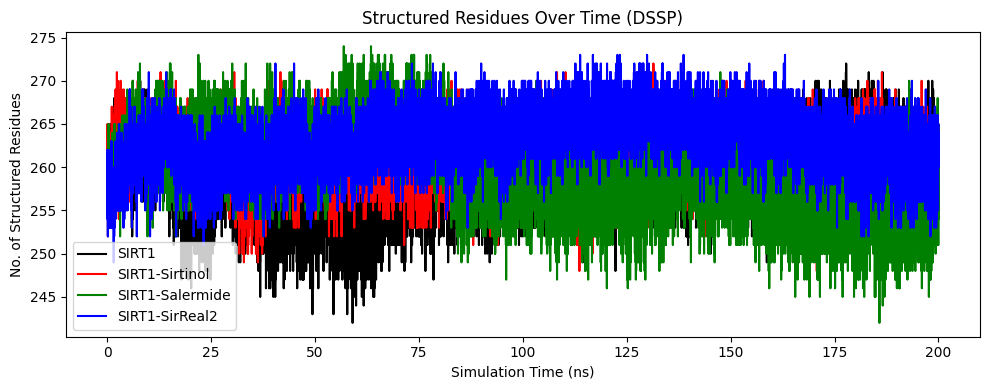

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Updated DSSP mapping (7 types including coil)
dssp_map = {
    'H': 1,  # Alpha-helix
    'E': 2,  # Beta-strand
    'B': 3,  # Beta-bridge
    'S': 4,  # Bend
    'T': 5,  # Turn
    'G': 6,  # 3-Helix
    '-': 7   # Coil (unstructured)
}
inv_map = {v: k for k, v in dssp_map.items()}
structure_names = {
    1: 'Alpha-Helix',
    2: 'Beta-Strand',
    3: 'Beta-Bridge',
    4: 'Bend',
    5: 'Turn',
    6: '3-Helix',
    7: 'Coil'
}

# Files and labels
filenames = [
    "SIRT1_apo_dssp.dat",
    "SIRT1_2827_dssp.dat",
    "SIRT1_1356_dssp.dat",
    "SIRT1_1096_dssp.dat"
]
labels = ["SIRT1", "SIRT1-Sirtinol", "SIRT1-Salermide", "SIRT1-SirReal2"]
colors = ["black", "red", "green", "blue"]

structure_summary_data = []
total_summary_data = []

plt.figure(figsize=(10, 4))
time_per_frame = 10  # ps

for filename, label, color in zip(filenames, labels, colors):
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]

    # Convert DSSP lines to numeric matrix
    dssp_matrix = np.array([[dssp_map.get(res, 7) for res in line] for line in lines])
    total_residues = dssp_matrix.shape[1]

    # Structured residues (not coil)
    structured_counts = np.sum(dssp_matrix != 7, axis=1)
    time = np.arange(len(structured_counts)) * time_per_frame
    plt.plot(time / 1000, structured_counts, label=label, color=color)

    # Per-structure type analysis
    for i in range(1, 8):  # Include 1–7
        per_frame_counts = np.sum(dssp_matrix == i, axis=1)
        avg = np.mean(per_frame_counts)
        std = np.std(per_frame_counts)
        initial = per_frame_counts[0]
        delta = avg - initial
        percent_avg = (avg / total_residues) * 100

        structure_summary_data.append({
            "System": label,
            "Structure": structure_names[i],
            "Initial": initial,
            "Average": avg,
            "StdDev": std,
            "Change_from_0": delta,
            "Average_%": round(percent_avg, 2)
        })

    # Total summary (structured + coil)
    total_initial = total_residues
    total_average_structured = np.mean(structured_counts)
    total_std = np.std(structured_counts)
    total_change = total_average_structured - structured_counts[0]

    total_summary_data.append({
        "System": label,
        "Total_Residues": total_initial,
        "Initial_Structured": structured_counts[0],
        "Average_Structured": total_average_structured,
        "StdDev": total_std,
        "Change_from_Initial": total_change,
        "Structured_%": round((total_average_structured / total_residues) * 100, 2),
        "Coil_%": round(100 - (total_average_structured / total_residues) * 100, 2)
    })

# Save CSV summaries
structure_df = pd.DataFrame(structure_summary_data)
structure_df.to_csv("structure_summary_7types.csv", index=False)

total_df = pd.DataFrame(total_summary_data)
total_df.to_csv("total_structured_summary_7types.csv", index=False)

# Final plot
plt.xlabel('Simulation Time (ns)')
plt.ylabel('No. of Structured Residues')
plt.title('Structured Residues Over Time (DSSP)')
plt.legend()
plt.tight_layout()
plt.savefig("SIRT1_DSSP_structured_residues_all.png", dpi=300)
plt.show()